**DELANYO NUTAKOR**

CS 251: Data Analysis and Visualization

Spring 2025

# Project 6 | Supervised Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/CS251/Projects/Project06')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=5, legacy='1.25')

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 4: Naive Bayes Classifier

After finishing your email preprocessing pipeline, implement the one other supervised learning algorithm we we will use to classify email, **Naive Bayes**.

### 4a. Implement Naive Bayes

In `naive_bayes.py`, implement the following methods:
- Constructor
- get methods
- `train(data, y)`: Train the Naive Bayes classifier so that it records the "statistics" of the training set: class priors (i.e. how likely an email is in the training set to be spam or ham?) and the class likelihoods (the probability of a word appearing in each class — spam or ham).
- `predict(data)`: Combine the class likelihoods and priors to compute the posterior distribution. The predicted class for a test sample is the class that yields the highest posterior probability.


#### Bayes rule ingredients: Priors and likelihood (`train`)

To compute class predictions (probability that a test example belong to either spam or ham classes), we need to evaluate **Bayes Rule**. This means computing the priors and likelihoods based on the training data.

**Prior:** $$P_c = \frac{N_c}{N}$$ where $P_c$ is the prior for class $c$ (spam or ham), $N_c$ is the number of training samples that belong to class $c$ and $N$ is the total number of training samples.

**Likelihood:** $$L_{c,w} = \frac{T_{c,w} + 1}{T_{c} + M}$$ where
- $L_{c,w}$ is the likelihood that word $w$ belongs to class $c$ (*i.e. what we are solving for*)
- $T_{c,w}$ is the total count of **word $w$** in emails that are only in class $c$ (*either spam or ham*)
- $T_{c}$ is the total count of **all words** that appear in emails of the class $c$ (*total number of words in all spam emails or total number of words in all ham emails*)
- $M$ is the number of features (*number of top words*).

#### Bayes rule ingredients: Posterior (`predict`)

To make predictions, we now combine the prior and likelihood to get the posterior:

**Log Posterior:** $$Log(\text{Post}_{i, c}) = Log(P_c) + \sum_{j \in J_i}x_{i,j}Log(L_{c,j})$$

 where
- $\text{Post}_{i,c}$ is the posterior for class $c$ for test sample $i$(*i.e. evidence that email $i$ is spam or ham*). We solve for its logarithm.
- $Log(P_c)$ is the logarithm of the prior for class $c$.
- $x_{i,j}$ is the number of times the jth word appears in the ith email.
- $Log(L_{c,j})$: is the log-likelihood of the jth word in class $c$.

In [ ]:
from naive_bayes import NaiveBayes

#### Test `train`

###### Class priors and likelihoods

The following test should be used only if storing the class priors and likelihoods directly.

In [ ]:
num_test_classes = 4
np.random.seed(0)
data_test = np.random.randint(low=0, high=20, size=(100, 6))
y_test = np.random.randint(low=0, high=num_test_classes, size=(100,))

nbc = NaiveBayes(num_classes=num_test_classes)
nbc.train(data_test, y_test)

print(f'Your class priors are: {nbc.get_priors()}\nand should be          [0.28 0.22 0.32 0.18].')
print(f'Your class likelihoods shape is {nbc.get_likelihoods().shape} and should be (4, 6).')
print(f'Your likelihoods are:\n{nbc.get_likelihoods()}')

print('and should be')
print('''[[0.15997 0.15091 0.2079  0.19106 0.14184 0.14832]
 [0.11859 0.16821 0.17914 0.16905 0.18082 0.18419]
 [0.16884 0.17318 0.14495 0.14332 0.18784 0.18187]
 [0.16126 0.17011 0.15831 0.13963 0.18977 0.18092]]''')

Your class priors are: [-1.27297 -1.51413 -1.13943 -1.7148 ]
and should be          [0.28 0.22 0.32 0.18].
Your class likelihoods shape is (4, 6) and should be (4, 6).
Your likelihoods are:
[[-1.83274 -1.89109 -1.57069 -1.65516 -1.95306 -1.90841]
 [-2.13211 -1.78255 -1.71958 -1.77756 -1.71023 -1.6918 ]
 [-1.77881 -1.75342 -1.93136 -1.94266 -1.67217 -1.70448]
 [-1.82475 -1.77132 -1.84321 -1.96879 -1.66192 -1.70968]]
and should be
[[0.15997 0.15091 0.2079  0.19106 0.14184 0.14832]
 [0.11859 0.16821 0.17914 0.16905 0.18082 0.18419]
 [0.16884 0.17318 0.14495 0.14332 0.18784 0.18187]
 [0.16126 0.17011 0.15831 0.13963 0.18977 0.18092]]


###### Log of class priors and likelihoods

This test should be used only if storing the log of the class priors and likelihoods.

In [ ]:
num_test_classes = 4
np.random.seed(0)
data_test = np.random.randint(low=0, high=20, size=(100, 6))
y_test = np.random.randint(low=0, high=num_test_classes, size=(100,))

nbc = NaiveBayes(num_classes=num_test_classes)
nbc.train(data_test, y_test)

print(f'Your log class priors are: {nbc.get_priors()}\nand should be              [-1.27297 -1.51413 -1.13943 -1.7148 ].')
print(f'Your log class likelihoods shape is {nbc.get_likelihoods().shape} and should be (4, 6).')
print(f'Your log likelihoods are:\n{nbc.get_likelihoods()}')


print('and should be')
print('''[[-1.83274 -1.89109 -1.57069 -1.65516 -1.95306 -1.90841]
 [-2.13211 -1.78255 -1.71958 -1.77756 -1.71023 -1.6918 ]
 [-1.77881 -1.75342 -1.93136 -1.94266 -1.67217 -1.70448]
 [-1.82475 -1.77132 -1.84321 -1.96879 -1.66192 -1.70968]]''')

Your log class priors are: [-1.27297 -1.51413 -1.13943 -1.7148 ]
and should be              [-1.27297 -1.51413 -1.13943 -1.7148 ].
Your log class likelihoods shape is (4, 6) and should be (4, 6).
Your log likelihoods are:
[[-1.83274 -1.89109 -1.57069 -1.65516 -1.95306 -1.90841]
 [-2.13211 -1.78255 -1.71958 -1.77756 -1.71023 -1.6918 ]
 [-1.77881 -1.75342 -1.93136 -1.94266 -1.67217 -1.70448]
 [-1.82475 -1.77132 -1.84321 -1.96879 -1.66192 -1.70968]]
and should be
[[-1.83274 -1.89109 -1.57069 -1.65516 -1.95306 -1.90841]
 [-2.13211 -1.78255 -1.71958 -1.77756 -1.71023 -1.6918 ]
 [-1.77881 -1.75342 -1.93136 -1.94266 -1.67217 -1.70448]
 [-1.82475 -1.77132 -1.84321 -1.96879 -1.66192 -1.70968]]


#### Test `predict`

In [ ]:
num_test_classes = 4
np.random.seed(0)
data_train = np.random.randint(low=0, high=15, size=(100, 10))
data_test = np.random.randint(low=0, high=15, size=(15, 10))
y_test = np.random.randint(low=0, high=num_test_classes, size=(100,))

nbc = NaiveBayes(num_classes=num_test_classes)
nbc.train(data_train, y_test)
test_y_pred = nbc.predict(data_test)

print(f'Your predicted classes are\n{test_y_pred}\nand should be\n[2 0 0 3 0 3 2 1 2 3 1 0 0 1 0]]')

Your predicted classes are
[2 0 0 3 0 3 2 1 2 3 1 0 0 1 0]
and should be
[2 0 0 3 0 3 2 1 2 3 1 0 0 1 0]]


### 4b. Use Naive Bayes to perform spam filtering on the Enron dataset

Run the cell below to load in the Enron train and test sets. Below, train your Naive Bayes classifier on the Enron train set and print out the accuracy on the test set.


In [ ]:
x_train = np.load('data/email_train_x.npy')
y_train = np.load('data/email_train_y.npy')
inds_train = np.load('data/email_train_inds.npy')
x_test = np.load('data/email_test_x.npy')
y_test = np.load('data/email_test_y.npy')
inds_test = np.load('data/email_test_inds.npy')

In [ ]:
num_classes = 2
nb_classifier = NaiveBayes(num_classes=num_classes)

nb_classifier.train(x_train, y_train)

y_pred = nb_classifier.predict(x_test)

accuracy = nb_classifier.accuracy(y_test, y_pred)

print(f"Naive Bayes Spam Classifier Results:")
print(f"Number of training emails: {len(y_train)}")
print(f"Number of test emails: {len(y_test)}")
print(f"Test set accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

ham_accuracy = np.mean((y_test == 0) & (y_pred == 0)) / np.mean(y_test == 0)
spam_accuracy = np.mean((y_test == 1) & (y_pred == 1)) / np.mean(y_test == 1)

print(f"Ham detection accuracy: {ham_accuracy:.4f} ({ham_accuracy*100:.2f}%)")
print(f"Spam detection accuracy: {spam_accuracy:.4f} ({spam_accuracy*100:.2f}%)")

Naive Bayes Spam Classifier Results:
Number of training emails: 26172
Number of test emails: 6542
Test set accuracy: 0.8958 (89.58%)
Ham detection accuracy: 0.8493 (84.93%)
Spam detection accuracy: 0.9443 (94.43%)


### 4d. Confusion matrix

To get a better sense of the errors that the Naive Bayes classifier makes, implement the `confusion_matrix` method in `Classifer` then create a confusion matrix of the spam classification results. Assign the confusion matrix below to the variable `conf_matrix_nb` and run the code below to help test your confusion matrix.

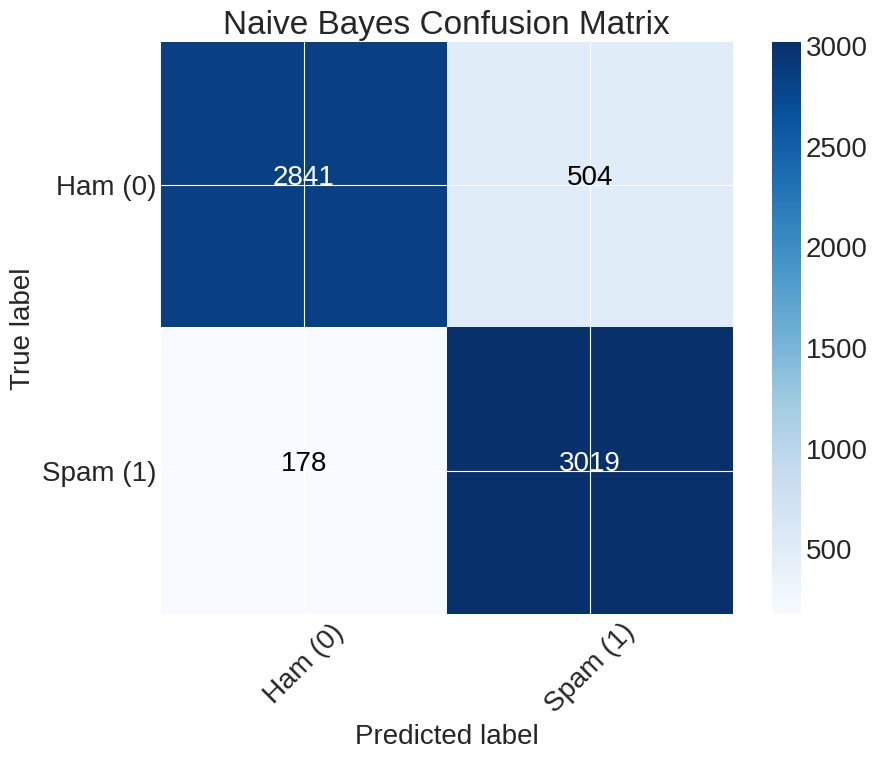

Confusion Matrix:
[[2841  504]
 [ 178 3019]]


In [ ]:
conf_matrix_nb = nb_classifier.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix_nb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Naive Bayes Confusion Matrix')
plt.colorbar()

classes = ['Ham (0)', 'Spam (1)']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix_nb.max() / 2.
for i in range(conf_matrix_nb.shape[0]):
    for j in range(conf_matrix_nb.shape[1]):
        plt.text(j, i, format(conf_matrix_nb[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_nb[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

print("Confusion Matrix:")
print(conf_matrix_nb)

#### Test confusion matrix

In [ ]:
print(f'The total number of entries in your confusion matrix is {int(conf_matrix_nb.sum())} and should be {len(y_test)}.')
print(f'The total number of ham entries in your confusion matrix is {int(conf_matrix_nb[0].sum())} and should be {int(np.sum(y_test == 0))}.')
print(f'The total number of spam entries in your confusion matrix is {int(conf_matrix_nb[1].sum())} and should be {int(np.sum(y_test == 1))}.')

The total number of entries in your confusion matrix is 6542 and should be 6542.
The total number of ham entries in your confusion matrix is 3345 and should be 3345.
The total number of spam entries in your confusion matrix is 3197 and should be 3197.


### 4e. Questions

**Question 8:** Interpret the confusion matrix, using the convention that positive detection means spam (*e.g. a false positive means classifying a ham email as spam*). What types of errors are made more frequently by the classifier? What does this mean (*i.e. X (spam/ham) is more likely to be classified than Y (spam/ham) than the other way around*)?

**Answer 8:**

Looking at the confusion matrix, the classifier makes more false positives (504 ham emails incorrectly classified as spam) than false negatives (178 spam emails incorrectly classified as ham). This means the classifier tends to be somewhat "aggressive" in flagging emails as spam. In practical terms, users would miss fewer actual spam emails but would need to occasionally check their spam folder for legitimate emails that were mistakenly filtered. This behavior suggests the classifier prioritizes catching spam over preserving every legitimate email, which might be reasonable since missing important emails is generally more problematic than dealing with some spam in your inbox.

## Task 5: Comparison with KNN

In [ ]:
from knn import KNN

### 5a. KNN spam email classification accuracy
Run a similar analysis to what you did with Naive Bayes above. Print out the test set accuracy on the test set.

*You may want to reduce the size of the test set (e.g. to the first 500 emails in the test set).*

In [ ]:
test_subset_size = 500
x_test_subset = x_test[:test_subset_size]
y_test_subset = y_test[:test_subset_size]

knn_classifier = KNN(num_classes=2)

train_subset_size = 5000
knn_classifier.train(x_train[:train_subset_size], y_train[:train_subset_size])

k_values = [1, 3, 5, 7, 9]
k_accuracies = []

print("Testing different k values...")
for k in k_values:
    y_pred_k = knn_classifier.predict(x_test_subset[:100], k)
    accuracy_k = knn_classifier.accuracy(y_test_subset[:100], y_pred_k)
    k_accuracies.append(accuracy_k)
    print(f"k = {k}, Accuracy = {accuracy_k:.4f}")

best_k = k_values[np.argmax(k_accuracies)]
print(f"\nBest k value: {best_k}")

Testing different k values...
k = 1, Accuracy = 0.8600
k = 3, Accuracy = 0.8800
k = 5, Accuracy = 0.9300
k = 7, Accuracy = 0.9200
k = 9, Accuracy = 0.9300

Best k value: 5


In [ ]:
print(f"Making predictions using k = {best_k}...")
y_pred_knn = knn_classifier.predict(x_test_subset, best_k)

accuracy_knn = knn_classifier.accuracy(y_test_subset, y_pred_knn)

print(f"\nKNN Spam Classifier Results:")
print(f"Number of training emails used: {train_subset_size}")
print(f"Number of test emails: {test_subset_size}")
print(f"Test set accuracy: {accuracy_knn:.4f} ({accuracy_knn*100:.2f}%)")

ham_accuracy_knn = np.mean((y_test_subset == 0) & (y_pred_knn == 0)) / np.mean(y_test_subset == 0) if np.mean(y_test_subset == 0) > 0 else 0
spam_accuracy_knn = np.mean((y_test_subset == 1) & (y_pred_knn == 1)) / np.mean(y_test_subset == 1) if np.mean(y_test_subset == 1) > 0 else 0

print(f"Ham detection accuracy: {ham_accuracy_knn:.4f} ({ham_accuracy_knn*100:.2f}%)")
print(f"Spam detection accuracy: {spam_accuracy_knn:.4f} ({spam_accuracy_knn*100:.2f}%)")

Making predictions using k = 5...

KNN Spam Classifier Results:
Number of training emails used: 5000
Number of test emails: 500
Test set accuracy: 0.9140 (91.40%)
Ham detection accuracy: 0.8681 (86.81%)
Spam detection accuracy: 0.9547 (95.47%)


### 5b. KNN spam email confusion matrix

In the cell below, create a confusion matrix for your KNN classifier results

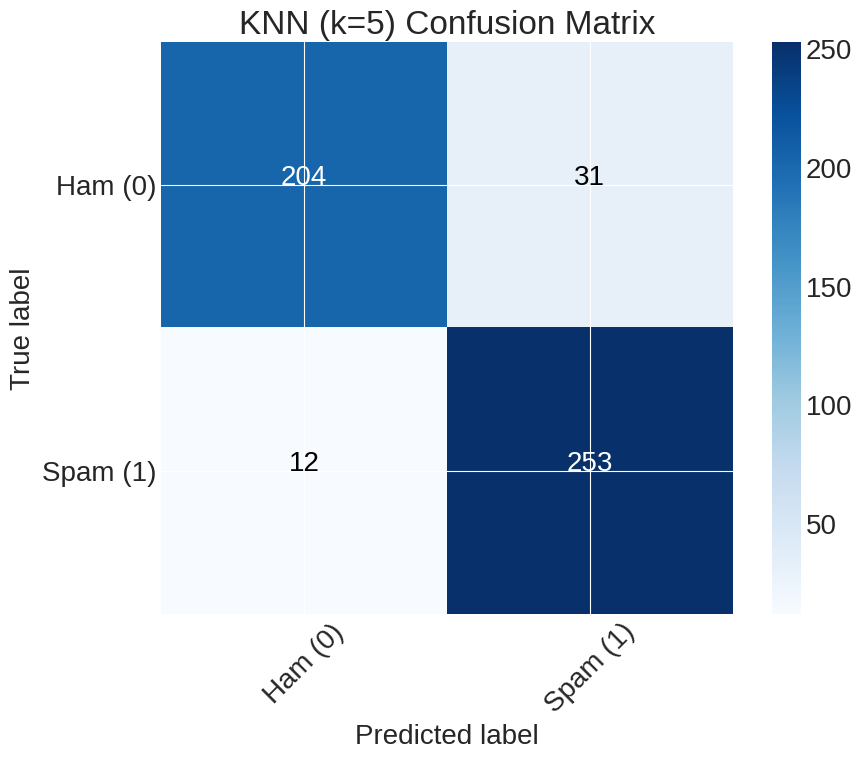

KNN Confusion Matrix:
[[204  31]
 [ 12 253]]


In [ ]:
conf_matrix_knn = knn_classifier.confusion_matrix(y_test_subset, y_pred_knn)

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'KNN (k={best_k}) Confusion Matrix')
plt.colorbar()

classes = ['Ham (0)', 'Spam (1)']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix_knn.max() / 2.
for i in range(conf_matrix_knn.shape[0]):
    for j in range(conf_matrix_knn.shape[1]):
        plt.text(j, i, format(conf_matrix_knn[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_knn[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

print("KNN Confusion Matrix:")
print(conf_matrix_knn)

### 5c. Questions

**Question 9:** How does the confusion matrix compare to that obtained by Naive Bayes (*If you reduced the test set size, keep that in mind*)?

**Answer 9:**

The KNN confusion matrix shows better overall balance compared to Naive Bayes, with fewer errors in both categories despite using a smaller test set. KNN makes fewer false positives (31 vs 504) and fewer false negatives (12 vs 178), showing more balanced performance between spam and ham classification. This suggests KNN is more accurate overall for this task when both error types are considered.

**Question 10:** What is the primary benefit and downside of KNN that we observe here compared to Naive Bayes? **Please be specific.**

**Answer 10:**

The primary benefit of KNN is its higher accuracy and better balance between error types - it correctly identifies both ham and spam with fewer mistakes in either direction. The major downside is computational efficiency - KNN required reducing the test set size significantly (only 500 samples vs thousands for Naive Bayes) because it must calculate distances between each test email and all training examples, making it impractical for large datasets without significant computing resources.

**Question 11:** When potentially reducing the size of the test set here, why is it important that we shuffled our train and test set?

**Answer 11:**

Shuffling before reducing the test set is crucial because emails in the dataset might be ordered by time, sender, or topic. Without shuffling, we might get a biased subset containing only certain types of emails or from specific time periods. Shuffling ensures our reduced dataset remains representative of the full distribution, giving us valid results that can be fairly compared with the Naive Bayes performance despite using fewer samples.